<a href="https://colab.research.google.com/github/mierjaX/clustering_kmodes/blob/main/Klasterisasi_k_Modes_(K%3D3)_Mirja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
!pip install kmodes
!pip install kneed
!pip install kneed[plot]
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

In [ ]:
# Preprocessing data
# Load your data
data_early = pd.read_excel("Data Survey Gabungan.xlsx")
pd.DataFrame(data_early)
data_early.info()
data_early

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   no_wa                 174 non-null    object
 1   jenis_kelamin         31 non-null     object
 2   usia                  203 non-null    object
 3   pekerjaan             31 non-null     object
 4   datang_bersama        31 non-null     object
 5   sumber_informasi      31 non-null     object
 6   berapa_kali           202 non-null    object
 7   kualitas_pelayanan    203 non-null    object
 8   kesiapan_meja         203 non-null    object
 9   waktu_tunggu_makanan  203 non-null    object
 10  kualitas_grill        203 non-null    object
 11  kualitas_suki         203 non-null    object
 12  kualitas_snack        203 non-null    object
 13  tingkat_kebersihan    203 non-null    object
 14  harga                 203 non-null    object
 15  hidangan_terbaik      31 non-null     ob

,no_wa,jenis_kelamin,usia,pekerjaan,datang_bersama,sumber_informasi,berapa_kali,kualitas_pelayanan,kesiapan_meja,waktu_tunggu_makanan,...,tingkat_kebersihan,harga,hidangan_terbaik,hidangan_terburuk,rating_overall,datang_kembali,merekomendasikan,kritik_saran,TGL BERKUNJUNG,NOMOR MEJA
0,081333601136,Pria,26 - 35 Tahun,Wirausaha,"Keluarga, Rombongan (Lebih dari 5 orang)",Instagram,Sering (Lebih dari 3 kali),Cukup,Baik,Baik,...,Baik,Sangat Baik,Daging,Cap Jay,Baik,Ya,Ya,Selalu berinovasi dan lebih ditingkatkan,NaN,NaN
1,082230574003,Pria,15 - 25 Tahun,Mahasiswa,Teman / Pasangan,Teman / Saudara,1 Kali,Cukup,Baik,Baik,...,Cukup,Baik,daging,sushi,Baik,Ya,Ya,tolong pada bagian snack diperbaiki lagi,NaN,NaN
2,-,Pria,15 - 25 Tahun,Karyawan Swasta,Rombongan (Lebih dari 5 orang),Teman / Saudara,2 Kali,Baik,Cukup,Cukup,...,Baik,Baik,Wagyu Saikoro,Beef Enoki,Baik,Tidak,Ya,Kesediaan alat makannya lebih diperhatikan kem...,NaN,NaN
3,-,Wanita,15 - 25 Tahun,mahasiswa,Keluarga,Instagram,Sering (Lebih dari 3 kali),Baik,Sangat Baik,Baik,...,Baik,Sangat Baik,saikoro beef,-,Baik,Ya,Ya,-,NaN,NaN
4,072125469421,Pria,15 - 25 Tahun,mahasiswa,Teman / Pasangan,Teman / Saudara,1 Kali,Baik,Baik,Sangat Baik,...,Baik,Cukup,es krim,beef,Cukup,Tidak,Ya,semoga bisa meminimalisir kandungan lemak yang...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,83831843132,NaN,26 - 35 Tahun,NaN,NaN,NaN,3 Kali,Sangat Baik,Sangat Baik,Sangat Baik,...,Sangat Baik,Sangat Baik,NaN,NaN,Sangat Baik,NaN,Ya,menu nya boleh ditambah variasi nya lagii.. ov...,4 Februari 2024,14
199,082330038170,NaN,26 - 35 Tahun,NaN,NaN,NaN,1 Kali,Sangat Baik,Sangat Baik,Sangat Baik,...,Sangat Baik,Sangat Baik,NaN,NaN,Sangat Baik,NaN,Ya,Sdh Cukup bagus pelayanannya,4 Mei 2024,11
200,82232199000,NaN,15 - 25 Tahun,NaN,NaN,NaN,3 Kali,Baik,Baik,Baik,...,Baik,Baik,NaN,NaN,Baik,NaN,Ya,"Mohon untuk di cek lagi kesegaran bahan"" yang ...",5 April 2024,15-16
201,0812597082839,NaN,15 - 25 Tahun,NaN,NaN,NaN,3 Kali,Cukup,Cukup,Cukup,...,Cukup,Cukup,NaN,NaN,Cukup,NaN,Ya,Tempatnya baru panas\nSausnya kurang saran dar...,8 Februari2024,13


In [ ]:
cek_duplikasi = data_early.duplicated()
cek_duplikasi.value_counts()

,count
False,203


In [ ]:
# Pilih variabel yang relevan
data_selected = data_early[['usia', 'rating_overall', 'kualitas_pelayanan', 'kesiapan_meja',
                     'waktu_tunggu_makanan', 'kualitas_grill', 'kualitas_suki',
                     'kualitas_snack', 'tingkat_kebersihan', 'harga']]
data_selected.info()
data_selected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   usia                  203 non-null    object
 1   rating_overall        203 non-null    object
 2   kualitas_pelayanan    203 non-null    object
 3   kesiapan_meja         203 non-null    object
 4   waktu_tunggu_makanan  203 non-null    object
 5   kualitas_grill        203 non-null    object
 6   kualitas_suki         203 non-null    object
 7   kualitas_snack        203 non-null    object
 8   tingkat_kebersihan    203 non-null    object
 9   harga                 203 non-null    object
dtypes: object(10)
memory usage: 16.0+ KB


,usia,rating_overall,kualitas_pelayanan,kesiapan_meja,waktu_tunggu_makanan,kualitas_grill,kualitas_suki,kualitas_snack,tingkat_kebersihan,harga
0,26 - 35 Tahun,Baik,Cukup,Baik,Baik,Sangat Baik,Baik,Cukup,Baik,Sangat Baik
1,15 - 25 Tahun,Baik,Cukup,Baik,Baik,Baik,Baik,Buruk,Cukup,Baik
2,15 - 25 Tahun,Baik,Baik,Cukup,Cukup,Baik,Cukup,Cukup,Baik,Baik
3,15 - 25 Tahun,Baik,Baik,Sangat Baik,Baik,Cukup,Baik,Baik,Baik,Sangat Baik
4,15 - 25 Tahun,Cukup,Baik,Baik,Sangat Baik,Cukup,Cukup,Baik,Baik,Cukup
...,...,...,...,...,...,...,...,...,...,...
198,26 - 35 Tahun,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik
199,26 - 35 Tahun,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik
200,15 - 25 Tahun,Baik,Baik,Baik,Baik,Buruk,Buruk,Buruk,Baik,Baik
201,15 - 25 Tahun,Cukup,Cukup,Cukup,Cukup,Cukup,Cukup,Cukup,Cukup,Cukup


In [ ]:
# Cek missing value
pd.isna(data_selected).sum()

,0
usia,0
rating_overall,0
kualitas_pelayanan,0
kesiapan_meja,0
waktu_tunggu_makanan,0
kualitas_grill,0
kualitas_suki,0
kualitas_snack,0
tingkat_kebersihan,0
harga,0


In [ ]:
# Drop the rows that contain null values
data_selected.dropna(inplace=True)

<ipython-input-8-5c9e09fd0f16>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected.dropna(inplace=True)


In [ ]:
# Convert ke data kategorikal
col_names = list(data_selected)
for col in col_names:
    data_selected[col] = data_selected[col].astype('category', copy=False)
data_selected.describe()
data_selected.info()
data_selected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   usia                  203 non-null    category
 1   rating_overall        203 non-null    category
 2   kualitas_pelayanan    203 non-null    category
 3   kesiapan_meja         203 non-null    category
 4   waktu_tunggu_makanan  203 non-null    category
 5   kualitas_grill        203 non-null    category
 6   kualitas_suki         203 non-null    category
 7   kualitas_snack        203 non-null    category
 8   tingkat_kebersihan    203 non-null    category
 9   harga                 203 non-null    category
dtypes: category(10)
memory usage: 4.3 KB


<ipython-input-9-445b17345d48>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[col] = data_selected[col].astype('category', copy=False)
<ipython-input-9-445b17345d48>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[col] = data_selected[col].astype('category', copy=False)
<ipython-input-9-445b17345d48>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,usia,rating_overall,kualitas_pelayanan,kesiapan_meja,waktu_tunggu_makanan,kualitas_grill,kualitas_suki,kualitas_snack,tingkat_kebersihan,harga
0,26 - 35 Tahun,Baik,Cukup,Baik,Baik,Sangat Baik,Baik,Cukup,Baik,Sangat Baik
1,15 - 25 Tahun,Baik,Cukup,Baik,Baik,Baik,Baik,Buruk,Cukup,Baik
2,15 - 25 Tahun,Baik,Baik,Cukup,Cukup,Baik,Cukup,Cukup,Baik,Baik
3,15 - 25 Tahun,Baik,Baik,Sangat Baik,Baik,Cukup,Baik,Baik,Baik,Sangat Baik
4,15 - 25 Tahun,Cukup,Baik,Baik,Sangat Baik,Cukup,Cukup,Baik,Baik,Cukup
...,...,...,...,...,...,...,...,...,...,...
198,26 - 35 Tahun,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik
199,26 - 35 Tahun,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik
200,15 - 25 Tahun,Baik,Baik,Baik,Baik,Buruk,Buruk,Buruk,Baik,Baik
201,15 - 25 Tahun,Cukup,Cukup,Cukup,Cukup,Cukup,Cukup,Cukup,Cukup,Cukup


In [ ]:
# Syarat label transform
custom_mapping = {
    'usia': {'15 - 25 Tahun': 1, '26 - 35 Tahun': 2, '36 - 45 Tahun': 3, '46 - 56 Tahun': 4, 'Diatas 57 Tahun': 5},
    'rating_overall': {'Sangat Buruk': 1,'Sangat Buruk ': 1, 'Buruk': 2,'Buruk ': 2,'Buruk  ': 2, 'Cukup': 3,'Cukup ': 3, 'Baik': 4,'Baik ': 4, 'Sangat Baik': 5,'Sangat Baik ': 5},
    'kualitas_pelayanan': {'Sangat Buruk': 1,'Sangat Buruk ': 1, 'Buruk': 2,'Buruk ': 2,'Buruk  ': 2, 'Cukup': 3,'Cukup ': 3, 'Baik': 4,'Baik ': 4, 'Sangat Baik': 5,'Sangat Baik ': 5},
    'kesiapan_meja': {'Sangat Buruk': 1,'Sangat Buruk ': 1, 'Buruk': 2,'Buruk ': 2,'Buruk  ': 2, 'Cukup': 3,'Cukup ': 3, 'Baik': 4,'Baik ': 4, 'Sangat Baik': 5,'Sangat Baik ': 5},
    'waktu_tunggu_makanan': {'Sangat Buruk': 1,'Sangat Buruk ': 1, 'Buruk': 2,'Buruk ': 2,'Buruk  ': 2, 'Cukup': 3,'Cukup ': 3, 'Baik': 4,'Baik ': 4, 'Sangat Baik': 5,'Sangat Baik ': 5},
    'kualitas_grill': {'Sangat Buruk': 1,'Sangat Buruk ': 1, 'Buruk': 2,'Buruk ': 2,'Buruk  ': 2, 'Cukup': 3,'Cukup ': 3, 'Baik': 4,'Baik ': 4, 'Sangat Baik': 5,'Sangat Baik ': 5},
    'kualitas_suki': {'Sangat Buruk': 1,'Sangat Buruk ': 1, 'Buruk': 2,'Buruk ': 2,'Buruk  ': 2, 'Cukup': 3,'Cukup ': 3, 'Baik': 4,'Baik ': 4, 'Sangat Baik': 5,'Sangat Baik ': 5},
    'kualitas_snack': {'Sangat Buruk': 1,'Sangat Buruk ': 1, 'Buruk': 2,'Buruk ': 2,'Buruk  ': 2, 'Cukup': 3,'Cukup ': 3, 'Baik': 4,'Baik ': 4, 'Sangat Baik': 5,'Sangat Baik ': 5},
    'tingkat_kebersihan': {'Sangat Buruk': 1,'Sangat Buruk ': 1, 'Buruk': 2,'Buruk ': 2,'Buruk  ': 2, 'Cukup': 3,'Cukup ': 3, 'Baik': 4,'Baik ': 4, 'Sangat Baik': 5,'Sangat Baik ': 5},
    'harga': {'Sangat Buruk': 1,'Sangat Buruk ': 1, 'Buruk': 2,'Buruk ': 2,'Buruk  ': 2, 'Cukup': 3,'Cukup ': 3, 'Baik': 4,'Baik ': 4, 'Sangat Baik': 5,'Sangat Baik ': 5}
    # ... pemetaan untuk kolom lainnya
}

# Terapkan transformasi ke data_selected
for col, mapping in custom_mapping.items():
    data_selected[col] = data_selected[col].replace(mapping)

datafix = data_selected
datafix.info()
datafix
# datafix.to_excel('data setelah preprocessing.xlsx', index=False)

<ipython-input-10-fa7155004fd0>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_selected[col] = data_selected[col].replace(mapping)
<ipython-input-10-fa7155004fd0>:18: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_selected[col] = data_selected[col].replace(mapping)
<ipython-input-10-fa7155004fd0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   usia                  203 non-null    category
 1   rating_overall        203 non-null    category
 2   kualitas_pelayanan    203 non-null    category
 3   kesiapan_meja         203 non-null    category
 4   waktu_tunggu_makanan  203 non-null    category
 5   kualitas_grill        203 non-null    category
 6   kualitas_suki         203 non-null    category
 7   kualitas_snack        203 non-null    category
 8   tingkat_kebersihan    203 non-null    category
 9   harga                 203 non-null    category
dtypes: category(10)
memory usage: 4.0 KB


,usia,rating_overall,kualitas_pelayanan,kesiapan_meja,waktu_tunggu_makanan,kualitas_grill,kualitas_suki,kualitas_snack,tingkat_kebersihan,harga
0,2,4,3,4,4,5,4,3,4,5
1,1,4,3,4,4,4,4,2,3,4
2,1,4,4,3,3,4,3,3,4,4
3,1,4,4,5,4,3,4,4,4,5
4,1,3,4,4,5,3,3,4,4,3
...,...,...,...,...,...,...,...,...,...,...
198,2,5,5,5,5,5,5,5,5,5
199,2,5,5,5,5,5,5,5,5,5
200,1,4,4,4,4,2,2,2,4,4
201,1,3,3,3,3,3,3,3,3,3


In [ ]:
cost = []
silhouette_avg = {}
silhouette = []
K = range(2,11)
for num_clusters in list(K):
    # Clustering
    # init: huang, cao
    kmode = KModes(n_clusters=num_clusters, init = "cao", verbose=1)

    # Class of Clustering
    classes = kmode.fit_predict(datafix)
    labels = kmode.labels_
    cost.append(kmode.cost_)
    silhouette_avg[num_clusters] = (silhouette_score(datafix, classes, metric='hamming'))
    silhouette.append(silhouette_score(datafix, classes, metric='hamming'))

    cluster = pd.DataFrame(classes)
    centroid = pd.DataFrame(kmode.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost: 406.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 6, cost: 406.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6, cost: 406.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 6, cost: 406.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 6, cost: 406.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 6, cost: 406.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 6, cost: 406.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100, moves:

Optimal k value:  3


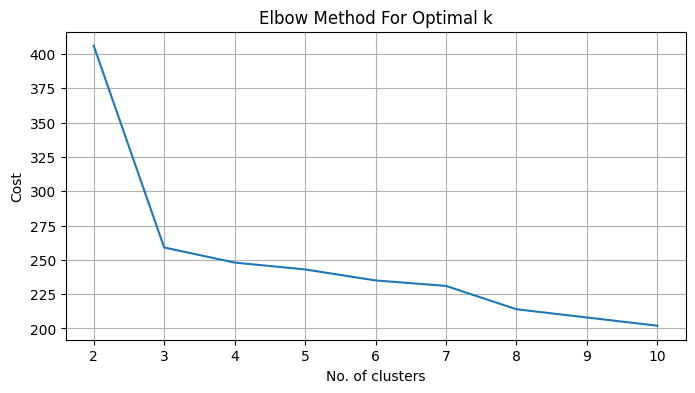

In [ ]:
K = range(2,11)
# concave, convex
kn = KneeLocator(K, cost, curve='convex', direction='decreasing')
print('Optimal k value: ',kn.knee)

# Visualize the Elbow method
plt.figure(figsize=(8,4))
plt.plot(K, cost)
plt.grid(True)
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
# plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red')
plt.show()

In [ ]:
# Silhouette Index
K = range(2,11)
for i in list(K):
    print(f'The Silhouette Score for {i} clusters is {silhouette_avg[i]:.5f}')

The Silhouette Score for 2 clusters is 0.64128
The Silhouette Score for 3 clusters is 0.74973
The Silhouette Score for 4 clusters is 0.67655
The Silhouette Score for 5 clusters is 0.65271
The Silhouette Score for 6 clusters is 0.62684
The Silhouette Score for 7 clusters is 0.60303
The Silhouette Score for 8 clusters is 0.61311
The Silhouette Score for 9 clusters is 0.60776
The Silhouette Score for 10 clusters is 0.61061


In [ ]:
n_clusters = 3
kmode3 = KModes(n_clusters, init = "cao", verbose=1)
    # Kelas Clustering

classes3 = kmode3.fit_predict(datafix)
labels3 = kmode3.labels_

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost: 259.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 6, cost: 259.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6, cost: 259.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 6, cost: 259.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 6, cost: 259.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 6, cost: 259.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 6, cost: 259.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100, moves:

In [ ]:
# Set the first cluster = 1
for i in range(0,len(classes3)):
    classes3[i]+=1

In [ ]:
# Check the centroid
centroids3 = kmode3.cluster_centroids_
centroids3

array([[1, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [1, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [1, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

In [ ]:
cluster3 = datafix.copy()
cluster3.insert(10, "Cluster", classes3, True)
cluster3

,usia,rating_overall,kualitas_pelayanan,kesiapan_meja,waktu_tunggu_makanan,kualitas_grill,kualitas_suki,kualitas_snack,tingkat_kebersihan,harga,Cluster
0,2,4,3,4,4,5,4,3,4,5,2
1,1,4,3,4,4,4,4,2,3,4,2
2,1,4,4,3,3,4,3,3,4,4,2
3,1,4,4,5,4,3,4,4,4,5,2
4,1,3,4,4,5,3,3,4,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...
198,2,5,5,5,5,5,5,5,5,5,1
199,2,5,5,5,5,5,5,5,5,5,1
200,1,4,4,4,4,2,2,2,4,4,2
201,1,3,3,3,3,3,3,3,3,3,3


In [ ]:
cluster3.to_excel('Data survey setelah preprocessing.xlsx', index=False)